In [1]:
# !pip install -U numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import gensim
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from collections import Counter
import gensim.downloader as api

C:\Users\ADMIN\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
def load_data(filepath, sep_type, col_1='label', col_2='message', has_header=True):
    """Load dataset from file and return a DataFrame, adjusting for headers."""
    if has_header:
        # Load with the first row as header
        return pd.read_csv(filepath, sep=sep_type, header=0)
    else:
        # Load without headers and assign column names
        return pd.read_csv(filepath, sep=sep_type, header=None, names=[col_1, col_2])

In [4]:
def preprocess_email(email):
    lemmatizer = WordNetLemmatizer()
    # Loại bỏ ký tự không mong muốn
    email_cleaned = re.sub('[^a-zA-Z]', ' ', email)
    # Chuyển thành chữ thường và tách từ
    email_cleaned = email_cleaned.lower().split()
    # Lemmatization
    email_cleaned = [lemmatizer.lemmatize(word, pos='v') for word in email_cleaned if not word in stopwords.words('english')]
    # email_cleaned = ' '.join(email_cleaned)
    
    return email_cleaned

In [5]:
def data_analist(data, corpus):
    df = pd.DataFrame(data)
    print('\n', df.isnull().sum())
    print('\n', df['label'].value_counts())
    print('\n', df.info())
    print(df.columns)
    print('\n', df['label'].value_counts()/len (df)*100)

In [6]:
def avg_word2vec(words, w2v_model):
    # Apply word2vec
    vectors = [w2v_model[word] for word in words if word in w2v_model.key_to_index]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(300)

In [7]:
from gensim.models import KeyedVectors

messages = load_data('SMSSpamCollection.txt', '\t', has_header=False)

corpus = [preprocess_email(email) for email in messages['message']]

In [8]:
data_analist(messages, corpus)


 label      0
message    0
dtype: int64

 label
ham     4825
spam     747
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

 None
Index(['label', 'message'], dtype='object')

 label
ham     86.593683
spam    13.406317
Name: count, dtype: float64


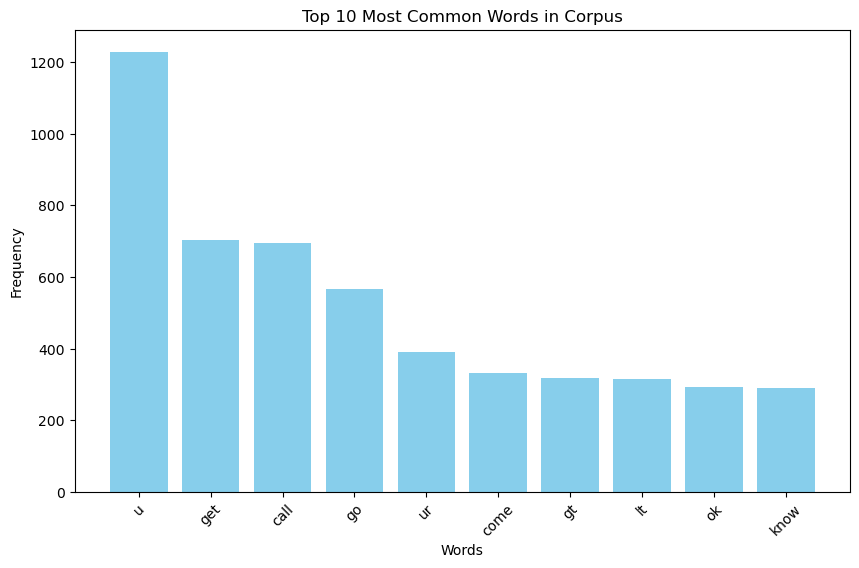

In [9]:
# Calculate word frequency
all_words = [word for email in corpus for word in email]
word_freq = Counter(all_words)
    
# Select the 10 most common words
most_common_words = word_freq.most_common(10)
words, frequencies = zip(*most_common_words)  # separate words and their counts
    
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Corpus')
plt.xticks(rotation=45)
plt.show()

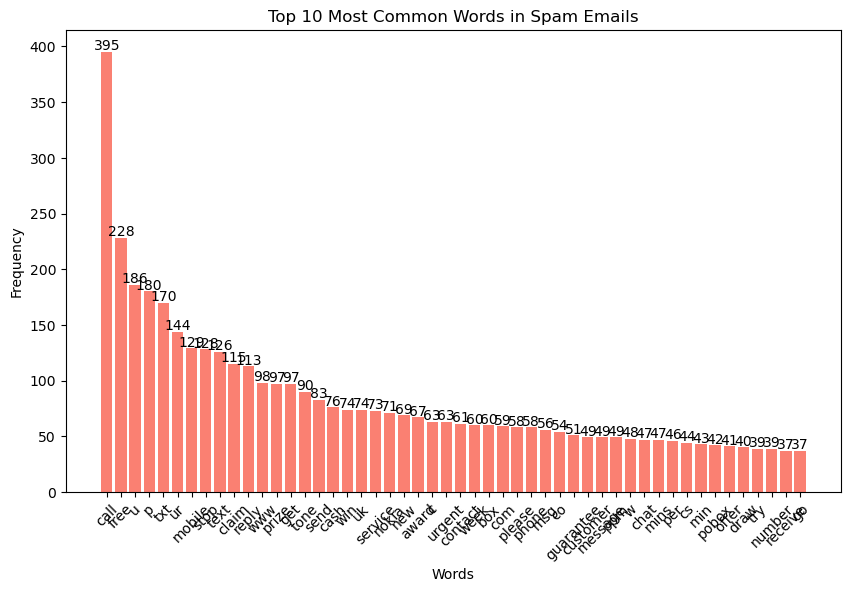

In [10]:
# Separate corpus into spam and ham messages
spam_corpus = [corpus[i] for i in range(len(corpus)) if messages['label'].iloc[i] == 'spam']
ham_corpus = [corpus[i] for i in range(len(corpus)) if messages['label'].iloc[i] == 'ham']
    
# Flatten lists and calculate word frequencies for spam and ham
spam_words = [word for email in spam_corpus for word in email]
spam_word_freq = Counter(spam_words)
    
# Get top 10 most common words in spam emails
spam_common_words = spam_word_freq.most_common(50)
spam_words, spam_frequencies = zip(*spam_common_words)
    
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(spam_words, spam_frequencies, color='salmon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
    
# Add frequency values on top of each bar
for bar, freq in zip(bars, spam_frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1,  # position slightly below the top of each bar
                f'{freq}', ha='center', va='bottom', fontsize=10, color='black')
    
plt.show()

In [11]:
# Print top 50 most common words in spam emails with their frequencies
print("Top 50 Most Common Words in Spam Emails:")
for word, freq in spam_common_words:
    print(f"{word}: {freq}")

Top 50 Most Common Words in Spam Emails:
call: 395
free: 228
u: 186
p: 180
txt: 170
ur: 144
mobile: 129
stop: 128
text: 126
claim: 115
reply: 113
www: 98
prize: 97
get: 97
tone: 90
send: 83
cash: 76
win: 74
uk: 74
service: 73
nokia: 71
new: 69
award: 67
c: 63
urgent: 63
contact: 61
week: 60
box: 60
com: 59
please: 58
phone: 58
msg: 56
co: 54
guarantee: 51
customer: 49
message: 49
ppm: 49
w: 48
chat: 47
mins: 47
per: 46
cs: 44
min: 43
pobox: 42
offer: 41
draw: 40
try: 39
number: 39
receive: 37
go: 37


In [12]:
from gensim.models import KeyedVectors

messages = load_data('SMSSpamCollection.txt', '\t', has_header=False)

corpus = [preprocess_email(email) for email in messages['message']]

# Use word2vec pre-trained model of Google
w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [13]:
X = []
for i in range(len(corpus)):
    X.append(avg_word2vec(corpus[i], w2v_model))
X

[array([-0.02186367,  0.03751046,  0.01293945,  0.22126116, -0.03855024,
         0.05995832,  0.08770316, -0.08377511,  0.02556065,  0.06941128,
        -0.06918812, -0.15935408, -0.02175031, -0.03429304, -0.10885184,
         0.14549038,  0.15129744,  0.08725194,  0.04471261, -0.02184405,
        -0.06591923, -0.01583481,  0.09420341,  0.04590716, -0.01609584,
         0.01966728, -0.1333531 ,  0.0186942 ,  0.04531806, -0.05304827,
        -0.06559099,  0.0278729 , -0.06100028, -0.01063756, -0.01777867,
        -0.05209432, -0.0265537 , -0.02597482,  0.02948189,  0.03945487,
         0.0459246 , -0.08013916,  0.12259347,  0.05170986,  0.01405116,
        -0.08467756, -0.10012817, -0.04580143,  0.01157052,  0.1110927 ,
        -0.07965088,  0.15630667, -0.02421352,  0.01549421, -0.06201281,
         0.07901437, -0.09970964, -0.12990461,  0.04012626, -0.09318324,
        -0.09409441,  0.02947126, -0.1012922 , -0.05391148,  0.0204555 ,
        -0.10787092, -0.07825143,  0.04918562, -0.0